In [56]:
# Write your imports here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
from io import TextIOWrapper
import re

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [30]:
zip_path = 'data\spotify_most_streamed_2024.zip'

csv_file_name = 'Most Streamed Spotify Songs 2024.csv'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_file_name) as file:
        with TextIOWrapper(file, encoding='unicode_escape') as text_file:
            spotify_df = pd.read_csv(text_file)

In [31]:
spotify_df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [32]:
spotify_df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

First we will take care of the column names and then we will proceed to the cleaning - the columns with reach, count, streams, etc all need to be floats or integers

In [33]:
def pythonic_columns(column_name):
    column_name = column_name.lower()
    # Replace spaces with underscores
    column_name = column_name.replace(' ', '_')
    # Replace special characters with underscores
    column_name = re.sub(r'\W+', '_', column_name)
    # Ensure column names are valid Python identifiers
    column_name = re.sub(r'^[^a-zA-Z_]+', '', column_name)
    return column_name

spotify_df.columns = [pythonic_columns(col) for col in spotify_df.columns]

In [34]:
spotify_df.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [35]:
spotify_df.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams                object
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

First we will take care of the release date column, where we will convert all to datetime.

In [36]:
spotify_df['release_date']

0       4/26/2024
1        5/4/2024
2       3/19/2024
3       1/12/2023
4       5/31/2024
          ...    
4595     9/5/2017
4596    7/27/2018
4597    2/28/2020
4598    11/8/2016
4599    4/11/2017
Name: release_date, Length: 4600, dtype: object

In [37]:
for col in spotify_df.columns:
        try:
            # Attempt to convert the column to datetime, assuming MM/DD/YYYY format
            spotify_df[col] = pd.to_datetime(spotify_df[col], format='%m/%d/%Y')
        except (ValueError, TypeError):
            # If conversion fails, leave the column as is
            pass

Next, off to the all time rank. It clearly needs to be integer.

In [38]:
spotify_df['all_time_rank'] = spotify_df['all_time_rank'].str.replace(',', '').astype(int)


Now track scores need to be floats.

In [39]:
spotify_df['track_score'] = spotify_df['track_score'].astype(float)

deezer_playlist_reach, pandora_streams, pandora_track_stations, soundcloud_streams, shazam_counts, airplay_spins, siriusxm_spins, youtube_views, youtube_likes, tiktok_posts, tiktok_likes, tiktok_views, youtube_playlist_reach, spotify_streams, spotify_playlist_count, spotify_playlist_reach will all undergo the same process in order to be converted to integers.

In [40]:
columns_to_convert = [
    'deezer_playlist_reach', 'pandora_streams', 
    'pandora_track_stations', 'soundcloud_streams', 'shazam_counts', 'airplay_spins', 'siriusxm_spins', 
    'youtube_views', 'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach', 
    'spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach'
]

def convert_column(df, column):
    df[column] = df[column].astype(str).str.replace(',', '')
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')

for column in columns_to_convert:
    convert_column(spotify_df, column)

In [41]:
spotify_df.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                          int32
track_score                          float64
spotify_streams                        Int64
spotify_playlist_count                 Int64
spotify_playlist_reach                 Int64
spotify_popularity                   float64
youtube_views                          Int64
youtube_likes                          Int64
tiktok_posts                           Int64
tiktok_likes                           Int64
tiktok_views                           Int64
youtube_playlist_reach                 Int64
apple_music_playlist_count           float64
airplay_spins                          Int64
siriusxm_spins                         Int64
deezer_playlist_count                float64
deezer_playlist_reach                  Int64
amazon_pla

Everything looks clear now, we will decide which columns seem redundant once we get started analysing them.

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [44]:
artist_song_count = spotify_df['artist'].value_counts().head(5)
artist_song_count

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

The answer to the first question would be Drake, Taylor Swift, Bad Bunny, KAROL G and The Weeknd.

In [47]:
clean_artists = spotify_df[spotify_df['explicit_track'] == 0]['artist'].value_counts()

clean_artists = clean_artists[clean_artists.index.isin(spotify_df.groupby('artist')['explicit_track'].sum()[spotify_df.groupby('artist')['explicit_track'].sum() == 0].index)]
clean_artists = clean_artists.head(5)

clean_artists

artist
Imagine Dragons    16
BTS                14
Linkin Park        13
Luke Combs         13
Ozuna              12
Name: count, dtype: int64

The five clean-mouth artists with most songs on Spotify are Imagine Dragons, BTS, Linkin Park, Luke Combs and Ozuna.

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [48]:
artist_streams = spotify_df.groupby('artist')['spotify_streams'].sum()
top_5_artists_by_streams = artist_streams.sort_values(ascending=False).head(5)

top_5_artists_by_streams

artist
Bad Bunny       37054834425
The Weeknd      36948540278
Drake           34962157577
Taylor Swift    34470771165
Post Malone     26137472958
Name: spotify_streams, dtype: Int64

Bad Bunny, The Weeknd, Drake, Taylor Swift, Post Malone hot the top 5 positions for most streams on Spotify.

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [51]:
spotify_df['release_year'] = spotify_df['release_date'].dt.year
songs_per_year = spotify_df['release_year'].value_counts().sort_index()

spotify_df['release_month'] = spotify_df['release_date'].dt.month
songs_per_month = spotify_df['release_month'].value_counts().sort_index()

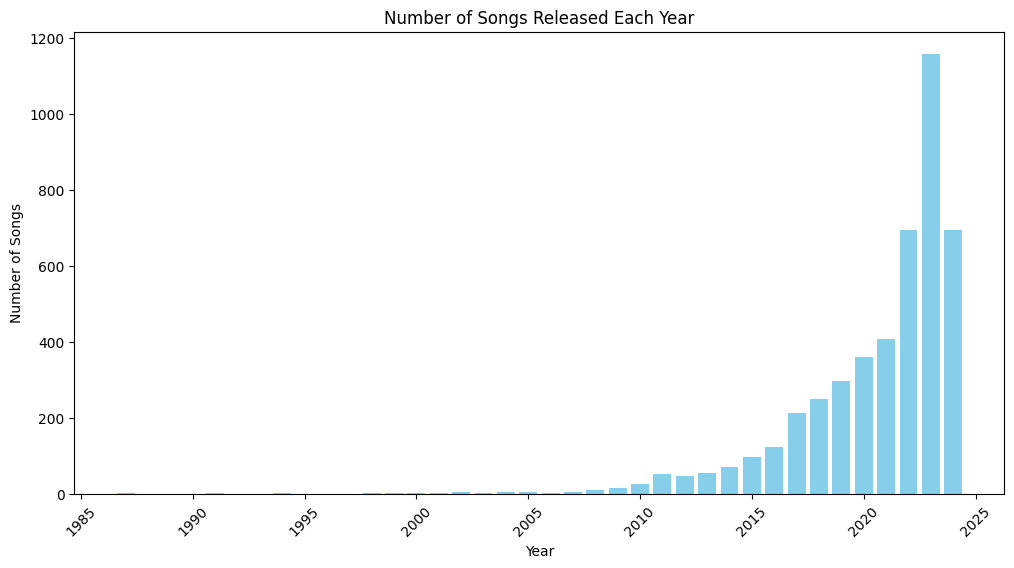

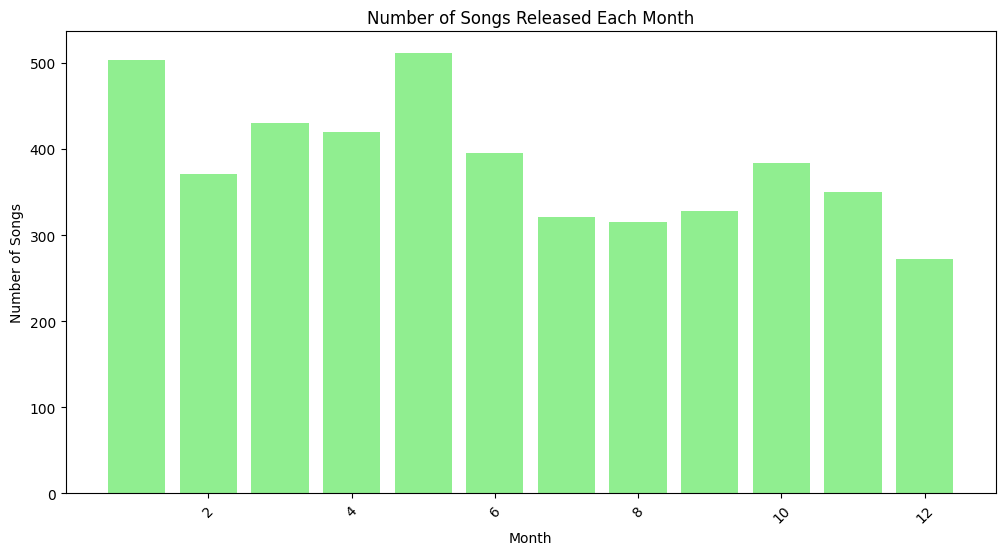

In [54]:
plt.figure(figsize=(12, 6))
plt.bar(songs_per_year.index, songs_per_year.values, color='skyblue')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(songs_per_month.index, songs_per_month.values, color='lightgreen')
plt.title('Number of Songs Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

There is a clear upward trend throughout the years, with the released songs peaking in 2023 with nearly 1200 new songs. In 2024 a decrease is observed slightly above 600, half the value from a year earlier, which could be explained by the fact that the year is incomplete, thus the data and the plot would look different by the end of the year. 

At the same time the monthly releases fluctuate with just 2 obvious peaks in January and May which seem like the most favourable months for artists with approximately 500 new tracks. December holds the bottom position being the month with the least new releases, just below 300. 

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [55]:
playlist_data = spotify_df[['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']]

pearson_corr = playlist_data.corr(method='pearson')
spearman_corr = playlist_data.corr(method='spearman')
kendall_corr = playlist_data.corr(method='kendall')

We are going to dive into three different types of correlation in order to examine the relationship between user's behaviour on different services. 

* Pearson Correlation measures linear relationships.
* Spearman Correlation measures monotonic relationships regardless of their linearity.
* Kendall Correlation measures the strength of dependence between two variables.

With heatmaps we have a visual to help us understand the connections with colour gradient. 

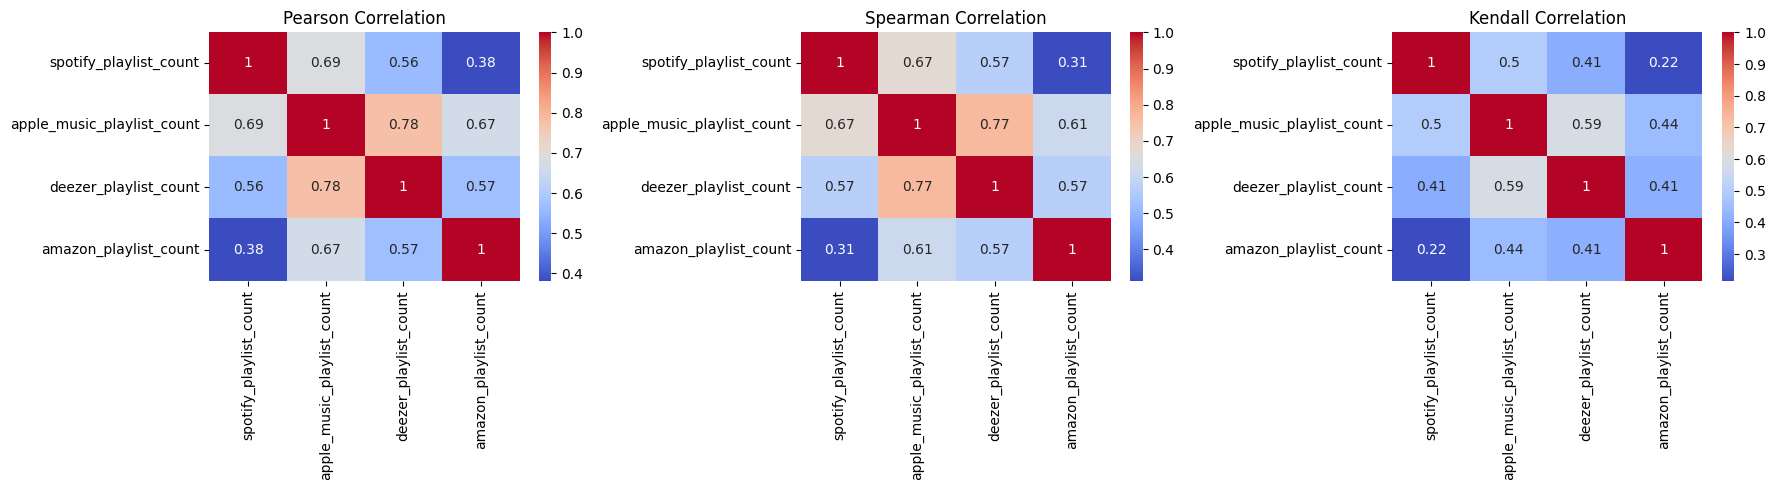

In [58]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation')

plt.subplot(1, 3, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation')

plt.subplot(1, 3, 3)
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm')
plt.title('Kendall Correlation')

plt.tight_layout()
plt.show()


What we can deduce from the heatmaps is that there is a direct linear correlation between adding songs on apple music playlists and on deezer playlists, at the same time people on spotify are not dependent on amazon and vice versa. Another thing that is clear is that apple music users are more versatile in their choice of music services, and there tends to be a stronger connection between adding songs on apple music and on any other provider. 

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.